## Kelompok 3 : Klasifikasi & Regresi menggunakan Model Decision Tree pada Dataset Order Payment Olist


Dataset Order Payment List berisi data mengenai pembayaran, yang terdiri dari kolom: order_id, payment_sequential, payment_type, payment_installments, dan payment_value. Dataset ini memiliki lebih dari 100.000 baris, mencerminkan berbagai transaksi dengan beragam jenis metode pembayaran. Karena adanya ketidakseimbangan jumlah transaksi berdasarkan jenis pembayaran, dilakukan proses balancing data untuk analisis lebih optimal.

Variabel fitur (X) yang digunakan:

    payment_sequential

    payment_installments

    payment_value

Variabel target (y) yang dikategorikan berdasarkan jenis pembayaran (payment_type) menjadi dua kelas:

    0 = Low Spender

    1 = High Spender

#Koneksi ke gdrive

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


#Tampilkan isi folder

In [ ]:
'/content/drive/MyDrive/Classroom/Kelompok 3'

'/content/drive/MyDrive/Classroom/Kelompok 3'

In [ ]:
from mpl_toolkits.axisartist.axislines import SubplotZero
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style='ticks')
import matplotlib.cm as cm
from sklearn import preprocessing
# Import necessary modules for preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from collections import Counter
from imblearn.over_sampling import SMOTE
# Import ColumnTransformer for combining preprocessing steps
from sklearn.compose import ColumnTransformer


#Load dataset

In [ ]:
#load data google drive
df = pd.read_csv('/content/drive/MyDrive/Classroom/Kelompok 3/olist_order_payments_dataset.csv')
print (df.shape)

(103886, 5)


#Tampilkan Contoh Data

In [ ]:
df.head((10))

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
5,298fcdf1f73eb413e4d26d01b25bc1cd,1,credit_card,2,96.12
6,771ee386b001f06208a7419e4fc1bbd7,1,credit_card,1,81.16
7,3d7239c394a212faae122962df514ac7,1,credit_card,3,51.84
8,1f78449c87a54faf9e96e88ba1491fa9,1,credit_card,6,341.09
9,0573b5e23cbd798006520e1d5b4c6714,1,boleto,1,51.95


In [ ]:
print(df.tail(10))

                                order_id  payment_sequential payment_type  \
103876  0872d0faafe0cb56e6f2c594cca1522c                   1  credit_card   
103877  3531718b24dfd5022fb0d101e10e33b9                   1  credit_card   
103878  2e3d96522c8c378d4135c12a65c977aa                   1  credit_card   
103879  c45067032fd84f4cf408730ff5205568                   1  credit_card   
103880  7159096c5aa9be77f7f0c26c01ee9793                   1  credit_card   
103881  0406037ad97740d563a178ecc7a2075c                   1       boleto   
103882  7b905861d7c825891d6347454ea7863f                   1  credit_card   
103883  32609bbb3dd69b3c066a6860554a77bf                   1  credit_card   
103884  b8b61059626efa996a60be9bb9320e10                   1  credit_card   
103885  28bbae6599b09d39ca406b747b6632b1                   1       boleto   

        payment_installments  payment_value  
103876                     2         127.92  
103877                     1         194.11  
103878        

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [ ]:
df

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


#Klasifikasi menggunakan Desiction Tree

#1) Feature Scalling

In [ ]:
# Memilih fitur numerik
X = df[['payment_sequential', 'payment_installments', 'payment_value']]

# Label target (payment_type)
y = df['payment_type']

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
print(df.isnull().sum())

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64


#2) Memisahkan fitur dan label

In [ ]:
# Memilih fitur numerik
X = df[['payment_sequential', 'payment_installments', 'payment_value']]

# Label target (payment_type)
y = df['payment_type']

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
import pandas as pd

X = df[['payment_sequential', 'payment_installments', 'payment_value']]
y = df['payment_type']

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)

selector = SelectKBest(score_func=f_classif, k='all')
X_new = selector.fit_transform(X, y_encoded)

selected_features = X.columns[selector.get_support()]
X_selected_df = pd.DataFrame(X_new, columns=selected_features)

print ('Fitur - Fitur Terpilih Berdasarkan SelectKBest')
print(X_selected_df.head())

Fitur - Fitur Terpilih Berdasarkan SelectKBest
   payment_sequential  payment_installments  payment_value
0                 1.0                   8.0          99.33
1                 1.0                   1.0          24.39
2                 1.0                   1.0          65.71
3                 1.0                   8.0         107.78
4                 1.0                   2.0         128.45


In [ ]:
df['payment_type'].value_counts()

,count
payment_type,
credit_card,76795
boleto,19784
voucher,5775
debit_card,1529
not_defined,3


##1) Pilih fitur yang akan di gunakan


In [ ]:
# Memilih fitur numerik
X = df[['payment_sequential', 'payment_installments', 'payment_value', 'order_id']]

# Label target (payment_type)
y = df['payment_type']

In [ ]:
print(df.isnull().sum())

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64


In [ ]:
# Agregasi total payment per payment_type
agg_df = df.groupby('payment_type').sum(numeric_only=True).reset_index()
agg_df = agg_df[['payment_type', 'payment_value']]
agg_df = agg_df.sort_values(by='payment_value', ascending=False)

print("Total pengeluaran per payment_type:")
print(agg_df)

Total pengeluaran per payment_type:
  payment_type  payment_value
1  credit_card    12542084.19
0       boleto     2869361.27
4      voucher      379436.87
2   debit_card      217989.79
3  not_defined           0.00


In [ ]:
# Labeling: High spender jika payment_value > 5000
df_grouped = df.groupby('payment_type').sum(numeric_only=True).reset_index()
df_grouped['label'] = df_grouped['payment_value'].apply(lambda x: 1 if x > 5000 else 0)

In [ ]:
# Gabungkan kembali label ke dataset asli
df = df.merge(df_grouped[['payment_type', 'label']], on='payment_type', how='left')

In [ ]:
# 4. Seleksi fitur
X = df[['payment_sequential', 'payment_installments', 'payment_value']]
y = df['label']

##2) Lakukan Pre processing

In [ ]:
import pandas as pd

# Load dataset
# Changed pd.read.csv to pd.read_csv to fix the AttributeError
df = pd.read_csv('/content/drive/MyDrive/Classroom/Kelompok 3/olist_order_payments_dataset.csv')

# Pilih fitur dan target
df = df[['payment_sequential', 'payment_type', 'payment_installments', 'payment_value']]

# Cek dan bersihkan nilai NaN
df = df.dropna()

# Hitung total payment_value per payment_type
total_payment_per_type = df.groupby('payment_type')['payment_value'].sum().reset_index()

# Tandai payment_type dengan total payment_value > 5000 sebagai "high spender" (label = 1)
# Ubah threshold jadi 200000
high_spender_types = total_payment_per_type[total_payment_per_type['payment_value'] > 2000000]['payment_type']

df['label'] = df['payment_type'].apply(lambda x: 1 if x in high_spender_types.values else 0)

In [ ]:
print(high_spender_types.tolist())
print("Jumlah payment_type dengan total < 2000000:", len(high_spender_types))


['boleto', 'credit_card']
Jumlah payment_type dengan total < 2000000: 2


In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
# Encode payment_type
le = LabelEncoder()
df['payment_type_encoded'] = le.fit_transform(df['payment_type'])

# Fitur dan target
X = df[['payment_sequential', 'payment_installments', 'payment_value']]
y = df['label']

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Balancing dengan SMOTE
smote = SMOTE(random_state=42, k_neighbors=2)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)



##3) Bagi dataset training dan testing

In [ ]:
from sklearn.model_selection import train_test_split

# Split 70% training, 30% testing (setelah SMOTE)
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled)


In [ ]:
print("Banyak data latih (fitur) setelah dilakukan Train-Test Split: ", len(X_train))
print("Banyak data latih (label) setelah dilakukan Train-Test Split: ", len(y_train)) # Corrected variable name
print("Banyak data uji (fitur) setelah dilakukan Train-Test Split: ", len(X_test))
print("Banyak data uji (label) setelah dilakukan Train-Test Split: ", len(y_test)) # Corrected variable name

Banyak data latih (fitur) setelah dilakukan Train-Test Split:  135210
Banyak data latih (label) setelah dilakukan Train-Test Split:  135210
Banyak data uji (fitur) setelah dilakukan Train-Test Split:  57948
Banyak data uji (label) setelah dilakukan Train-Test Split:  57948


##4) Sipkan classifier tentukan variable dan parameter

In [ ]:
# Import library untuk klasifikasi dengan Decision Tree
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Code classifier
classifier = DecisionTreeClassifier(max_depth=7, min_samples_split=3, random_state=0)

##5) Training classifier pada dataset

In [ ]:
# Split 70% training, 30% testing (setelah SMOTE)
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled)
# Changed Y_train to y_train to match the variable name from the split
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, min_samples_split=3, random_state=0)

In [ ]:
print(X)

        payment_sequential  payment_installments  payment_value
0                        1                     8          99.33
1                        1                     1          24.39
2                        1                     1          65.71
3                        1                     8         107.78
4                        1                     2         128.45
...                    ...                   ...            ...
103881                   1                     1         363.31
103882                   1                     2          96.80
103883                   1                     1          47.77
103884                   1                     5         369.54
103885                   1                     1         191.58

[103886 rows x 3 columns]


In [ ]:
print(y)

0         1
1         1
2         1
3         1
4         1
         ..
103881    1
103882    1
103883    1
103884    1
103885    1
Name: label, Length: 103886, dtype: int64


In [ ]:
#hasil
print(le.classes_)


['boleto' 'credit_card' 'debit_card' 'not_defined' 'voucher']


In [ ]:
label_asli = le.inverse_transform([1])

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Inisialisasi dan fit label encoder
le = LabelEncoder()
le.fit(df['payment_type'])

# Menampilkan hasil mapping
for idx, label in enumerate(le.classes_):
    print(f"{label} → {idx}")

boleto → 0
credit_card → 1
debit_card → 2
not_defined → 3
voucher → 4


#Plot distribusi data asli (imbalanced)

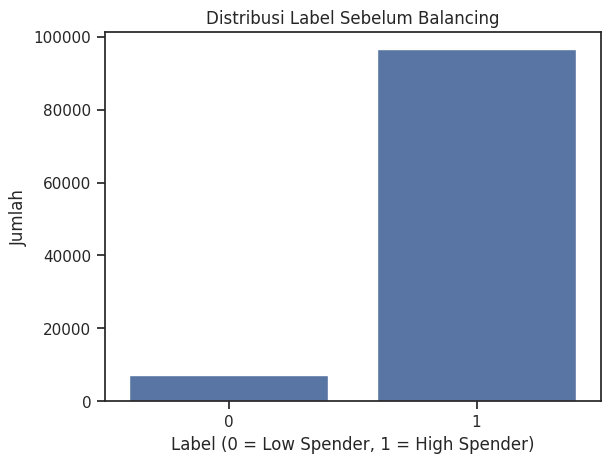

Distribusi label:
 label
1    96579
0     7307
Name: count, dtype: int64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribusi label (imbalanced)
sns.countplot(x=y)
plt.title("Distribusi Label Sebelum Balancing")
plt.xlabel("Label (0 = Low Spender, 1 = High Spender)")
plt.ylabel("Jumlah")
plt.show()

# Cek distribusi label secara numerik
print("Distribusi label:\n", y.value_counts())


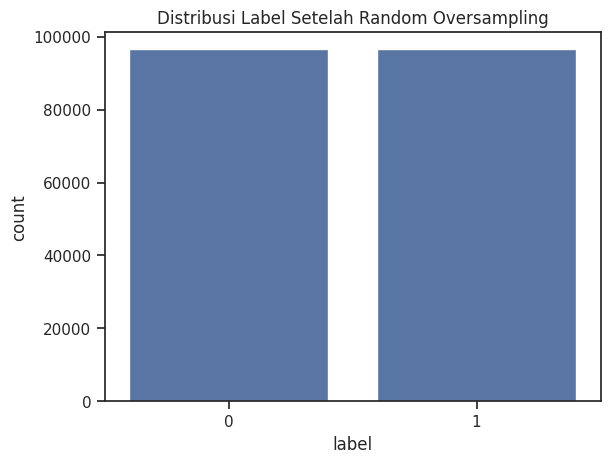

Distribusi label setelah ROS:
 label
1    96579
0    96579
Name: count, dtype: int64


In [ ]:
# Cek & Perbaiki Data Imbalance
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_scaled, y)

sns.countplot(x=y_resampled)
plt.title("Distribusi Label Setelah Random Oversampling")
plt.show()

print("Distribusi label setelah ROS:\n", pd.Series(y_resampled).value_counts())


In [ ]:
# Split ulang setelah SMOTE
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)


In [ ]:
# Bagi data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Inisialisasi KNN
knn = KNeighborsClassifier(n_neighbors=3)

# Training dengan .ravel() agar bentuk y sesuai
knn.fit(X_train, y_train.ravel())

# Prediksi
y_pred = knn.predict(X_test)

# Evaluasi
print(classification_report(y_test, y_pred))


<ipython-input-37-23257464>:8: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  knn.fit(X_train, y_train.ravel())


              precision    recall  f1-score   support

           0       0.88      0.61      0.72      1487
           1       0.97      0.99      0.98     19291

    accuracy                           0.97     20778
   macro avg       0.92      0.80      0.85     20778
weighted avg       0.96      0.97      0.96     20778



##6) Lakukan Pengujian dengan data uji

In [ ]:
# Ensure X_test is a numpy array before predicting
# This matches the data format used during training (X_scaled or X_train from previous splits)
hasil_klasifikasi = classifier.predict(X_test)

In [ ]:
# Assuming X_test is the variable you intend to use for prediction
# Ensure it is a numpy array and does not have feature names
if isinstance(X_test, pd.DataFrame):
    X_test_processed = X_test.values
else:
    X_test_processed = X_test # Assume it's already a numpy array

# Now predict using the processed X_test
hasil_klasifikasi = classifier.predict(X_test_processed)

In [ ]:
df_hasil_klasifikasi = pd.DataFrame({"prediksi":hasil_klasifikasi, "label_asli":y_test.values.ravel()})

print("\nPerbandingan Prediksi dan Label Asli:")
print(df_hasil_klasifikasi)



Perbandingan Prediksi dan Label Asli:
       prediksi  label_asli
0             1           0
1             1           1
2             1           1
3             1           1
4             1           1
...         ...         ...
20773         1           1
20774         1           1
20775         1           1
20776         1           1
20777         1           1

[20778 rows x 2 columns]


##7) Analisis Performance model

###a. Menngunakan accuracy score

In [ ]:
classifier.score(X_test, y_test)

0.9451824044662623

###b. Menggunakan confussion matrix

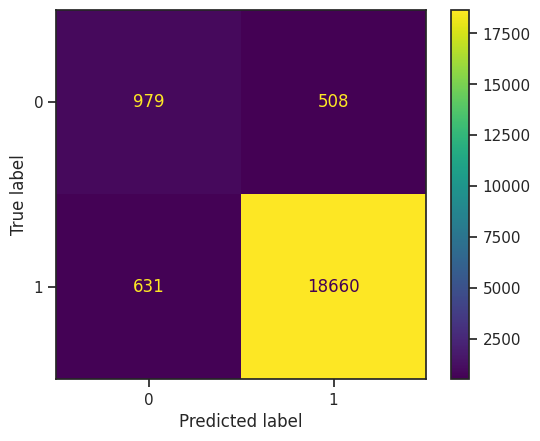

In [ ]:
# Code classification report
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test) # Changed Y_test to y_test

#plot_confusion_matrix(classifier, X_test, Y_test)
plt.show()

###c. Menggunakan Classification report


In [ ]:
# c. Menggunakan classification report
from sklearn.metrics import classification_report
print("\nClassification Report:")
print(classification_report(y_test, hasil_klasifikasi))


Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.66      0.63      1487
           1       0.97      0.97      0.97     19291

    accuracy                           0.95     20778
   macro avg       0.79      0.81      0.80     20778
weighted avg       0.95      0.95      0.95     20778



In [ ]:
from sklearn.metrics import classification_report

# Classification Report
print("Classification Report:")
# Use the correct prediction variable, hasil_klasifikasi
print(classification_report(y_test, hasil_klasifikasi, target_names=["Low Spender", "High Spender"]))

Classification Report:
              precision    recall  f1-score   support

 Low Spender       0.61      0.66      0.63      1487
High Spender       0.97      0.97      0.97     19291

    accuracy                           0.95     20778
   macro avg       0.79      0.81      0.80     20778
weighted avg       0.95      0.95      0.95     20778



##8) Menampilkan Plot Tree

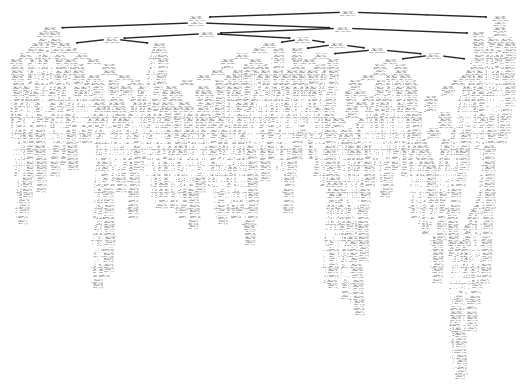

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Instantiate the Decision Tree model with a random_state for reproducibility
decision_tree_model = DecisionTreeClassifier(random_state=42)
# Train the Decision Tree model using the X_train and y_train from the second split
# Note that y_train is used instead of Y_train to match the second split's variable names
decision_tree_model.fit(X_train, y_train)
from sklearn import tree
# Pass the trained Decision Tree model to plot_tree
tree.plot_tree(decision_tree_model)
plt.show() # Add plt.show() to display the plot

##9) Kesimpulan Sebelum HPO

untuk kesimpulan sebelum HPO menunjukan hasil yang cukup baik dengan accuracy score 0.9319771545915421

##10) Optimasi HPO dengan RandomizedSearchCV

In [ ]:
# Kode HPO disini
#import library yang dibutuhkan
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier # Import DecisionTreeClassifier

# Definisikan parameter grid untuk pencarian
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 3, 4, 5]
}


In [ ]:
grid = GridSearchCV(DecisionTreeClassifier(), param_grid, scoring='f1', cv=5, refit = True, verbose = 3)

In [ ]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ..max_depth=3, min_samples_split=2;, score=0.984 total time=   0.1s
[CV 2/5] END ..max_depth=3, min_samples_split=2;, score=0.984 total time=   0.1s
[CV 3/5] END ..max_depth=3, min_samples_split=2;, score=0.983 total time=   0.1s
[CV 4/5] END ..max_depth=3, min_samples_split=2;, score=0.982 total time=   0.1s
[CV 5/5] END ..max_depth=3, min_samples_split=2;, score=0.985 total time=   0.1s
[CV 1/5] END ..max_depth=3, min_samples_split=3;, score=0.984 total time=   0.1s
[CV 2/5] END ..max_depth=3, min_samples_split=3;, score=0.984 total time=   0.1s
[CV 3/5] END ..max_depth=3, min_samples_split=3;, score=0.983 total time=   0.1s
[CV 4/5] END ..max_depth=3, min_samples_split=3;, score=0.982 total time=   0.1s
[CV 5/5] END ..max_depth=3, min_samples_split=3;, score=0.985 total time=   0.1s
[CV 1/5] END ..max_depth=3, min_samples_split=4;, score=0.984 total time=   0.1s
[CV 2/5] END ..max_depth=3, min_samples_split=4;

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 5, 7, 9],
                         'min_samples_split': [2, 3, 4, 5]},
             scoring='f1', verbose=3)

##11) Implementasi best param

In [ ]:
#tampilkan kombinasi parameter apa yang terbaik
print(grid.best_params_)

{'max_depth': 7, 'min_samples_split': 2}


In [ ]:
# Code untuk classifier ke 2
# kita tentukan cara perhitungan jarak dan nilai k nya
# classifier = KNeighborsClassifier(metric='manhattan', n_neighbors=5) ==> Score performance : 0.99
#Tahap 1
# classifier2 = KNeighborsClassifier(metric='manhattan', n_neighbors=1) # ==> Score performance: 0.99

classifier2 = DecisionTreeClassifier(max_depth=5, min_samples_split=2)


##12)Lakukan proses training denan data latih

In [ ]:
# Code training pada classifier ke 2
# X_train = data fitur latih
# Y_train = data label latih
# Use y_train from the second split (test_size=0.2)
classifier2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

##13)Lakukan pengujian dengan data uji

In [ ]:
# Code pengujian pada data test menggunakan classifier ke 2
# X_test = data fitur uji
hasil_klasifikasi2 = classifier2.predict(X_test)

In [ ]:
# Use y_test from the second split (test_size=0.2) to match X_test used for prediction
df_hasil_klasifikasi2 = pd.DataFrame({"prediksi":hasil_klasifikasi2, "label_asli":y_test.values.ravel()})
df_hasil_klasifikasi2

,prediksi,label_asli
0,1,0
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
20773,1,1
20774,1,1
20775,1,1
20776,1,1


##14) Analisa performance model setelah HPO

###a. accuracy score

In [ ]:
classifier2.score(X_test, y_test)

0.9700644912888632

###b. Cunfussion matrix

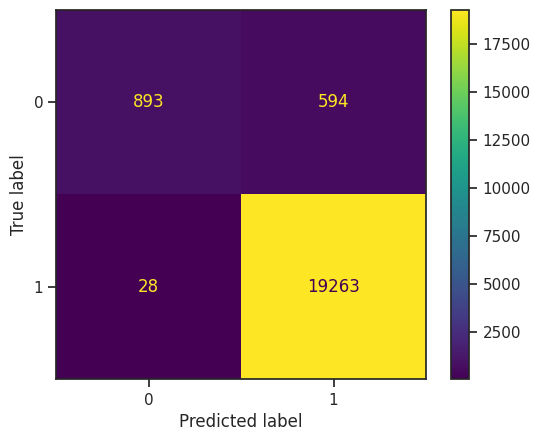

In [ ]:
# Code classification report
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(classifier2, X_test, y_test) # Changed Y_test to y_test

#plot_confusion_matrix(classifier, X_test, Y_test)
plt.show()

###c. Klassification report

In [ ]:
# Code analisa performansi menggunakan classification report
#namun lebih lengkap jika kita juga menghitung precision, recall dan f1-score
from sklearn.metrics import classification_report
# Use y_test from the second split (test_size=0.2) to match X_test used for prediction
print(classification_report(y_test, hasil_klasifikasi2))

              precision    recall  f1-score   support

           0       0.97      0.60      0.74      1487
           1       0.97      1.00      0.98     19291

    accuracy                           0.97     20778
   macro avg       0.97      0.80      0.86     20778
weighted avg       0.97      0.97      0.97     20778



#installl joblib

In [ ]:
!pip install joblib

In [ ]:
import joblib

In [ ]:
import joblib
from sklearn.tree import DecisionTreeClassifier  # atau model lain yg kamu pakai

# contoh training
model_klasifikasi = DecisionTreeClassifier()
model_klasifikasi.fit(X_train, y_train)

# simpan model
joblib.dump(model_klasifikasi, "knn_tubes.joblib")

['knn_tubes.joblib']

In [ ]:
import joblib
joblib.dump(model_klasifikasi, "knn_tubes.joblib")

['knn_tubes.joblib']

In [ ]:
from google.colab import files
files.download("knn_tubes.joblib")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving dt_model.pkl to dt_model (1).pkl


##15) Kesimpulan setelah HPO

Sebelum dilakukan Hyperparameter Optimization (HPO), model memiliki akurasi sebesar 0.9319. Setelah proses HPO, akurasi meningkat menjadi 0.9688. Hal ini menunjukkan bahwa performa model menjadi lebih baik setelah dilakukan optimasi terhadap parameter-parameter yang digunakan.

# B. Regresi menggunakan Model Decison Tree

Dataset ini merupakan sampel dari data operasional GlobalInfra Corp, sebuah perusahaan rekayasa sipil multinasional yang menangani lebih dari 1 juta proyek di seluruh dunia. Setiap baris dalam dataset ini merepresentasikan satu penugasan proyek kepada seorang insinyur, mencerminkan aktivitas manajemen sumber daya manusia dan teknis dalam proyek-proyek infrastruktur skala besar.

Dataset ini telah dipangkas menjadi 150.000 baris dari total data asli lebih dari 1 juta baris untuk keperluan eksplorasi data dan analisis yang lebih ringan namun tetap representatif.

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## 1) Load Dataset

In [ ]:
#load data google drive
import pandas as pd
df_regresi = pd.read_csv('/content/drive/MyDrive/Classroom/Kelompok 3/Civil Engineering Global Project Dataset.csv')
df_regresi

,Project ID,Certificates,Years of Experience,age,Time Arrival Strafe,Project Cost,Project Proximity,Violation Risk Index,Company PCAB Score,Weekly Overtime Hours,Salary Bracket,is_good
0,864629,0,5,45,5.26,141144.0,111.56,0.63,2,5.0,2,1
1,232937,12,7,34,2.66,1005257.0,131.46,0.31,3,5.0,3,0
2,987674,0,4,21,5.39,51424.0,100.31,0.52,3,3.0,1,0
3,128508,1,3,52,0.99,186154.0,123.69,0.67,3,10.0,1,0
4,139393,1,2,46,1.41,135718.0,101.17,0.66,2,4.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
999995,180796,13,7,31,-5.97,1028680.0,133.86,0.28,3,6.0,4,1
999996,701298,12,6,40,-21.35,977952.0,132.24,0.37,4,6.0,2,1
999997,994852,0,3,18,6.66,74561.0,103.94,0.58,2,4.0,1,0
999998,503775,14,6,26,-5.61,1014347.0,124.71,0.19,4,2.0,3,1


In [ ]:
df_regresi.describe()

,Project ID,Certificates,Years of Experience,age,Time Arrival Strafe,Project Cost,Project Proximity,Violation Risk Index,Company PCAB Score,Weekly Overtime Hours,Salary Bracket,is_good
count,1000000.000000,1000000.00000,1000000.000000,1000000.000000,1000000.000000,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.00000
mean,499999.500000,6.36699,5.008628,30.689284,0.496139,5.513406e+05,114.530015,0.431012,2.933225,4.095588,2.150000,0.50013
std,288675.278933,5.71089,1.977987,10.532012,9.764183,4.524546e+05,14.784617,0.191105,0.858342,2.224638,1.194781,0.50000
min,0.000000,0.00000,0.000000,18.000000,-51.320000,1.000000e+00,62.660000,0.080000,1.000000,0.000000,1.000000,0.00000
25%,249999.750000,0.00000,4.000000,22.750000,-5.000000,9.986675e+04,102.940000,0.250000,2.000000,3.000000,1.000000,0.00000
50%,499999.500000,6.00000,5.000000,28.000000,1.980000,5.587880e+05,117.670000,0.400000,3.000000,4.000000,2.000000,1.00000
75%,749999.250000,12.00000,6.000000,35.000000,6.170000,1.000004e+06,127.100000,0.600000,4.000000,6.000000,3.000000,1.00000
max,999999.000000,17.00000,14.000000,60.000000,82.920000,1.253680e+06,144.160000,0.900000,5.000000,15.000000,5.000000,1.00000


## Tampilkan Contoh Data

In [ ]:
df_regresi = df_regresi.head(150000)

In [ ]:
# Code untuk menampilkan contoh data
df_regresi.head()

,Project ID,Certificates,Years of Experience,age,Time Arrival Strafe,Project Cost,Project Proximity,Violation Risk Index,Company PCAB Score,Weekly Overtime Hours,Salary Bracket,is_good
0,864629,0,5,45,5.26,141144.0,111.56,0.63,2,5.0,2,1
1,232937,12,7,34,2.66,1005257.0,131.46,0.31,3,5.0,3,0
2,987674,0,4,21,5.39,51424.0,100.31,0.52,3,3.0,1,0
3,128508,1,3,52,0.99,186154.0,123.69,0.67,3,10.0,1,0
4,139393,1,2,46,1.41,135718.0,101.17,0.66,2,4.0,1,0


In [ ]:
df_regresi.describe()

,Project ID,Certificates,Years of Experience,age,Time Arrival Strafe,Project Cost,Project Proximity,Violation Risk Index,Company PCAB Score,Weekly Overtime Hours,Salary Bracket,is_good
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.500000e+05,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,499572.732307,6.341600,5.002127,30.662827,0.523506,5.493887e+05,114.464072,0.431686,2.930907,4.094067,2.146007,0.497947
std,288966.041723,5.711061,1.979765,10.549350,9.785763,4.523809e+05,14.795573,0.191161,0.858513,2.232170,1.194679,0.499997
min,3.000000,0.000000,0.000000,18.000000,-51.320000,1.400000e+01,65.020000,0.100000,1.000000,0.000000,1.000000,0.000000
25%,248864.500000,0.000000,4.000000,22.000000,-4.990000,9.958675e+04,102.880000,0.250000,2.000000,3.000000,1.000000,0.000000
50%,500043.000000,5.000000,5.000000,28.000000,2.000000,2.331070e+05,117.540000,0.410000,3.000000,4.000000,2.000000,0.000000
75%,750686.500000,12.000000,6.000000,35.000000,6.200000,9.997195e+05,127.060000,0.600000,4.000000,6.000000,3.000000,1.000000
max,999969.000000,17.000000,13.000000,60.000000,63.170000,1.217260e+06,143.210000,0.880000,5.000000,15.000000,5.000000,1.000000


In [ ]:
# Code untuk menampilkan info
df_regresi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Project ID             150000 non-null  int64  
 1   Certificates           150000 non-null  int64  
 2   Years of Experience    150000 non-null  int64  
 3   age                    150000 non-null  int64  
 4   Time Arrival Strafe    150000 non-null  float64
 5   Project Cost           150000 non-null  float64
 6   Project Proximity      150000 non-null  float64
 7   Violation Risk Index   150000 non-null  float64
 8   Company PCAB Score     150000 non-null  int64  
 9   Weekly Overtime Hours  150000 non-null  float64
 10  Salary Bracket         150000 non-null  int64  
 11  is_good                150000 non-null  int64  
dtypes: float64(5), int64(7)
memory usage: 13.7 MB


##2) Pilih fitur

In [ ]:
X = df_regresi[['Certificates', 'Years of Experience', 'age', 'Time Arrival Strafe',
                'Project Proximity', 'Violation Risk Index', 'Company PCAB Score',
                'Weekly Overtime Hours', 'Salary Bracket', 'is_good']]
Y = df_regresi[['Project Cost']]

##3) Lakukan pre processing

In [ ]:
# Memeriksa apakah ada baris dengan nilai kosong
print("\nApakah ada nilai kosong dalam dataset?")
print(df_regresi.isnull().values.any())


Apakah ada nilai kosong dalam dataset?
False


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 10))
X_scaled = scaler.fit_transform(X)

## 4) Pembagian Dataset Training dan Testing

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.3, random_state=99)

In [ ]:
print("Banyak data latih (fitur) setelah dilakukan Train-Test Split: ", len(X_train))
print("Banyak data latih (label) setelah dilakukan Train-Test Split: ", len(Y_train))
print("Banyak data uji (fitur) setelah dilakukan Train-Test Split: ", len(X_test))
print("Banyak data uji (label) setelah dilakukan Train-Test Split: ", len(Y_test))

Banyak data latih (fitur) setelah dilakukan Train-Test Split:  105000
Banyak data latih (label) setelah dilakukan Train-Test Split:  105000
Banyak data uji (fitur) setelah dilakukan Train-Test Split:  45000
Banyak data uji (label) setelah dilakukan Train-Test Split:  45000


# Plot distribusi data imbalanced

In [ ]:
# Hitung median Project Cost
threshold = df_regresi['Project Cost'].median()

# Buat kolom kategori 0/1
df_regresi['Project Cost Category'] = (df_regresi['Project Cost'] > threshold).astype(int)

# Buat label string juga
df_regresi['Project Cost Category Label'] = df_regresi['Project Cost Category'].replace({0: 'Low', 1: 'High'})

df_regresi['Project Cost Category Label'].value_counts()
print(df_regresi.columns)

Index(['Project ID', 'Certificates', 'Years of Experience', 'age',
       'Time Arrival Strafe', 'Project Cost', 'Project Proximity',
       'Violation Risk Index', 'Company PCAB Score', 'Weekly Overtime Hours',
       'Salary Bracket', 'is_good', 'Project Cost Category',
       'Project Cost Category Label'],
      dtype='object')


In [ ]:
threshold = df_regresi['Project Cost'].median()
print(f"Median Project Cost: {threshold:,.2f}")
#Low	≤ 233,107.00
#High	> 233,107.00

Median Project Cost: 233,107.00


In [ ]:
# Hitung median Project Cost
threshold = df_regresi['Project Cost'].median()

# Buat kolom kategori 0/1
df_regresi['Project Cost Category'] = (df_regresi['Project Cost'] > threshold).astype(int)

# Buat label string juga
df_regresi['Project Cost Category Label'] = df_regresi['Project Cost Category'].replace({0: 'Low', 1: 'High'})


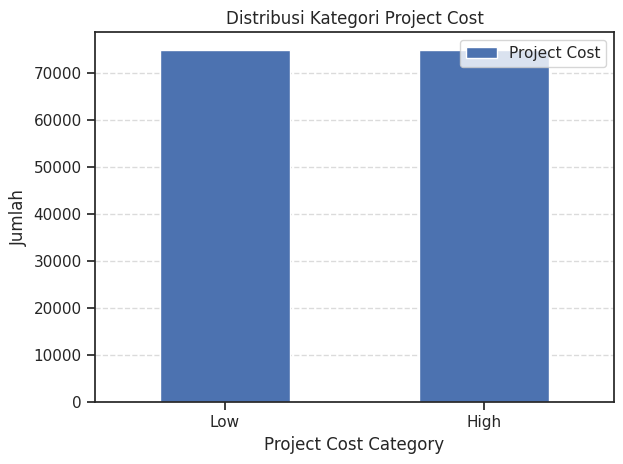

In [ ]:
# Group dan plot bar chart
df_regresi[['Project Cost', 'Project Cost Category']] \
    .groupby('Project Cost Category').count() \
    .plot.bar(legend=True)

# Format plot agar mirip
plt.xlabel('Project Cost Category')
plt.ylabel('Jumlah')
plt.title('Distribusi Kategori Project Cost')
plt.xticks(ticks=[0, 1], labels=['Low', 'High'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## 5) Siapkan regressor, tentukan variabel dan parameter

In [ ]:
# kita import library untuk regresi dengan K-Nearest Neighbor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [ ]:
# 1) Ini adalah variabel regressor pada KNN
# kita tentukan cara perhitungan jarak dan nilai k nya
# regressor = KNeighborsRegressor(metric='manhattan', n_neighbors=9)
# regressor = KNeighborsRegressor(metric='euclidean', n_neighbors=5)

# 2) Ini adalah variabel regressor pada Decision Tree
regressor = DecisionTreeRegressor(max_depth=5, min_samples_split=2)

## 6) Training regressor pada dataset


In [ ]:
# Code training regressor pada dataset
# 1) Ini adalah training pada KNN
# ingat bahwa tadi kita sudah punya data latihnya
# X_train = data fitur latih
# Y_train = data label latih
# regressor.fit(X_train, Y_train)

# 2) Ini adalah training pada Decision Tree
regressor.fit(X_train, Y_train)

DecisionTreeRegressor(max_depth=5)

## 7) Lakukan pengujian dengan data uji (melakukan prediksi)



In [ ]:
# Code pengujian (melakukan prediksi)
# 1) Ini adalah prediksi pada KNN
# ingat bahwa tadi kita sudah punya data ujinya
# X_test = data fitur uji
# hasil_regresi = regressor.predict(X_test)

# 2) Ini adalah prediksi pada Decision Tree
hasil_regresi = regressor.predict(X_test)

In [ ]:
hasil_regresi

array([ 980197.36224644, 1026109.3691193 ,   98494.13554394, ...,
       1026109.3691193 ,  980197.36224644, 1026109.3691193 ])

In [ ]:
df_hasil_regresi = pd.DataFrame({"prediksi":hasil_regresi, "label_asli":Y_test.values.ravel()}) # Changed Y_test to Y_test.values.ravel() to make it 1-dimensional
df_hasil_regresi

,prediksi,label_asli
0,9.801974e+05,970665.0
1,1.026109e+06,1013073.0
2,9.849414e+04,131961.0
3,1.001857e+06,1036825.0
4,9.849414e+04,188941.0
...,...,...
44995,9.849414e+04,75586.0
44996,1.001857e+06,961854.0
44997,1.026109e+06,1058308.0
44998,9.801974e+05,970667.0


## 8) Analisa performansi model

### a) Menggunakan Mean Absolute Error (MAE)

In [ ]:
#MAE (mean absolute error)
import numpy as np
print("Mean absolute error: %.2f" % np.mean(np.absolute(Y_test.values.ravel() - hasil_regresi))) # Changed Y_test to Y_test.values.ravel()


Mean absolute error: 37071.11


### b) Menggunakan Mean Squared Error (MSE)

In [ ]:
# Code analisa performansi menggunakan MSE
#MSE (mean squared error)
from sklearn.metrics import mean_squared_error
print('MSE=', mean_squared_error(Y_test, hasil_regresi))

# MSE= 0.14972567217142077 ==> dengan regressor awal

MSE= 2214944090.5115066


### c) Menggunakan RMSE

In [ ]:
#RMSE (root mean squared error)
from sklearn.metrics import mean_squared_error
print('RMSE=', mean_squared_error(Y_test, hasil_regresi))

RMSE= 2214944090.5115066


### d) Menggunakan R squared

In [ ]:
#R2 (r squared)
from sklearn.metrics import r2_score
print('R-squared=',r2_score(Y_test, hasil_regresi))

R-squared= 0.9891776296863337


## 9) Kesimpulan sebelum HPO

Sebelum dilakukan Hyperparameter Optimization (HPO), model KNN untuk regresi umur beras telah diuji dengan parameter default, yaitu n_neighbors=5 dan metric='euclidean'.

Berdasarkan hasil pengujian, diperoleh:

MAE: Nilai Mean Absolute Error (MAE) sebesar 0.11. MAE menunjukkan rata-rata kesalahan absolut antara nilai prediksi dan nilai sebenarnya. Semakin kecil nilai MAE, semakin baik kinerja model.
MSE: Nilai Mean Squared Error (MSE) sebesar 0.02. MSE mengukur rata-rata kuadrat kesalahan antara nilai prediksi dan nilai sebenarnya. Sama seperti MAE, semakin kecil nilai MSE, semakin baik kinerja model.
RMSE: Nilai Root Mean Squared Error (RMSE) sebesar 0.14. RMSE adalah akar kuadrat dari MSE dan memiliki satuan yang sama dengan variabel target. Semakin kecil nilai RMSE, semakin baik kinerja model.
R-squared: Nilai R-squared sebesar 0.99. R-squared menunjukkan seberapa baik model dapat menjelaskan varians dalam data. Nilai R-squared mendekati 1 menunjukkan bahwa model memiliki kemampuan prediksi yang sangat baik.
Secara keseluruhan, model KNN dengan parameter default menunjukkan performa yang sangat baik dalam memprediksi umur beras. Nilai MAE, MSE, dan RMSE yang rendah, serta nilai R-squared yang tinggi, mengindikasikan bahwa model mampu menghasilkan prediksi yang akurat dan mendekati nilai sebenarnya. Namun, HPO diharapkan dapat lebih meningkatkan performa model dengan mencari kombinasi parameter yang optimal

## 10) Optimasi: HPO dengan RandomizedSearchCV

In [ ]:
#import library yang dibutuhkan
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Param grid HPO
param_grid = [
    {'max_depth': [5, 10, 15], 'min_samples_split': [2, 10, 20], 'min_samples_leaf': [5]}
]

# Inisialisasi model
regressor = DecisionTreeRegressor(random_state=42)

# Buat objek GridSearchCV dengan verbose
grid = GridSearchCV(estimator=regressor, param_grid=param_grid, cv=5, verbose=3)


In [ ]:
# Latih model
grid.fit(X_train, Y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END max_depth=5, min_samples_leaf=5, min_samples_split=2;, score=0.990 total time=   0.3s
[CV 2/5] END max_depth=5, min_samples_leaf=5, min_samples_split=2;, score=0.989 total time=   0.2s
[CV 3/5] END max_depth=5, min_samples_leaf=5, min_samples_split=2;, score=0.989 total time=   0.2s
[CV 4/5] END max_depth=5, min_samples_leaf=5, min_samples_split=2;, score=0.989 total time=   0.2s
[CV 5/5] END max_depth=5, min_samples_leaf=5, min_samples_split=2;, score=0.989 total time=   0.2s
[CV 1/5] END max_depth=5, min_samples_leaf=5, min_samples_split=10;, score=0.990 total time=   0.2s
[CV 2/5] END max_depth=5, min_samples_leaf=5, min_samples_split=10;, score=0.989 total time=   0.2s
[CV 3/5] END max_depth=5, min_samples_leaf=5, min_samples_split=10;, score=0.989 total time=   0.2s
[CV 4/5] END max_depth=5, min_samples_leaf=5, min_samples_split=10;, score=0.989 total time=   0.2s
[CV 5/5] END max_depth=5, min_samples_leaf=5,

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
             param_grid=[{'max_depth': [5, 10, 15], 'min_samples_leaf': [5],
                          'min_samples_split': [2, 10, 20]}],
             verbose=3)

## 11) Implementasii best param

In [ ]:
print(grid.best_params_)

{'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 20}


In [ ]:

regressor2 = DecisionTreeRegressor(max_depth=15, min_samples_leaf=5, min_samples_split=20)

## 12) Lakukan proses training dengan data latih

In [ ]:
regressor2.fit(X_train, Y_train)

DecisionTreeRegressor(max_depth=15, min_samples_leaf=5, min_samples_split=20)

## 13) Lakukan pengujian dengan data uji

In [ ]:
hasil_regresi2 = regressor2.predict(X_test)

In [ ]:
hasil_regresi2

array([ 965354.33333333, 1035135.83809524,   84380.34246575, ...,
       1063075.05555556,  948602.68292683, 1075228.04347826])

In [ ]:
df_hasil_regresi2 = pd.DataFrame({"prediksi":hasil_regresi2, "label_asli":Y_test.values.ravel()}) # Changed Y_test to Y_test.values.ravel() to make it 1-dimensional
df_hasil_regresi2

,prediksi,label_asli
0,9.653543e+05,970665.0
1,1.035136e+06,1013073.0
2,8.438034e+04,131961.0
3,1.006667e+06,1036825.0
4,8.920128e+04,188941.0
...,...,...
44995,8.891965e+04,75586.0
44996,1.039118e+06,961854.0
44997,1.063075e+06,1058308.0
44998,9.486027e+05,970667.0


## 14) Analisa performansi model

### a) Menggunakan Mean Absolute Error (MAE)

In [ ]:
print('MAE=', mean_squared_error(Y_test, hasil_regresi2))

MAE= 1732390978.2202814


### b) Menggunakan Mean Squared Error (MSE)

In [ ]:
from sklearn.metrics import mean_squared_error
print('MSE=', mean_squared_error(Y_test, hasil_regresi2))

MSE= 1732390978.2202814


### c) Menggunakan RMSE

In [ ]:
from sklearn.metrics import mean_squared_error
RMSE = np.sqrt(mean_squared_error(Y_test, hasil_regresi2))
print('RMSE =', RMSE)

RMSE = 41622.00113185671


### d) Menggunakan R squared

In [ ]:
from sklearn.metrics import r2_score
print('R-squared=',r2_score(Y_test, hasil_regresi2))

R-squared= 0.9915354176321332


#install joblib

In [ ]:
reg_model = regressor2
joblib.dump(reg_model, "knn_tubes_regresi.joblib")
print(" Model regresi berhasil disimpan sebagai knn_tubes_regresi.joblib")

 Model regresi berhasil disimpan sebagai knn_tubes_regresi.joblib


In [ ]:
from google.colab import files
files.download("knn_tubes_regresi.joblib")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 15) Kesimpulan setelah HPO


In [ ]:
print(df_regresi.columns)

In [ ]:
# Menetapkan model regresi yang sudah dilatih (regressor2) ke variabel reg_model
reg_model = regressor2

# Sekarang Anda bisa menjalankan sel S5E_2B0Yibhm untuk menyimpan reg_model